In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.stattools as ts
import os
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller as ADF
from sklearn.decomposition import PCA
import gzip, cPickle

C:\Users\Juntao\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stock_data_adj_close = pd.read_excel('C:\\Users\\Juntao\\Desktop\\udemy_project\\all_the_data.xlsx')

In [4]:
stock_data_adj_close.head()

,Date,AA,AAPL,AXP,BA,BAC,CAT,CSCO,CVX,DIS,...,PG,TRV,UNH,UTX,V,VZ,WMT,XOM,^DJI,^GSPC
0,2000-01-03,71.915764,2.706315,35.900852,27.086088,12.542844,14.906949,44.310497,19.046656,23.423954,...,33.148941,20.681597,5.921339,20.098146,NaN,23.680845,48.454330,23.613300,11357.509766,1455.219971
1,2000-01-04,72.451111,2.478144,34.545280,27.043995,11.798365,14.715347,41.824585,19.046656,24.796074,...,32.511082,20.407404,5.845600,19.274130,NaN,22.915354,46.641258,23.161015,10997.929688,1399.420044
2,2000-01-05,76.733910,2.514410,33.667873,28.728983,11.927842,15.060226,41.696453,19.388294,25.825165,...,31.892557,20.250729,5.831829,18.892262,NaN,23.680845,45.689392,24.423641,11122.650391,1402.109985
3,2000-01-06,75.449089,2.296816,34.353794,29.023827,12.947443,15.826653,41.004509,20.213934,24.796074,...,33.361542,20.642420,6.045274,19.796686,NaN,23.560568,46.188000,25.686293,11253.259766,1403.449951
4,2000-01-07,75.306297,2.405613,34.853954,29.866318,12.607577,16.343996,43.413525,20.569817,24.404043,...,36.028934,21.464991,6.754457,20.580515,NaN,23.386597,49.678146,25.610918,11522.559570,1441.469971


In [5]:
etf_data_adj_close = pd.read_excel('etf_data.xlsx')

In [6]:
etf_data_adj_close.head()

,Date,AGG,BND,DIA,IJH,IJR,IVV,IVW,IWD,IWF,...,QQQ,SPY,VB,VNQ,VO,VOO,VTI,VTV,VUG,XLF
0,2000-01-03,NaN,NaN,75.598282,NaN,NaN,NaN,NaN,NaN,NaN,...,84.326424,103.807343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.962534
1,2000-01-04,NaN,NaN,73.110947,NaN,NaN,NaN,NaN,NaN,NaN,...,78.541489,99.747833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.527010
2,2000-01-05,NaN,NaN,74.057983,NaN,NaN,NaN,NaN,NaN,NaN,...,76.539001,99.926254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.452150
3,2000-01-06,NaN,NaN,74.432602,NaN,NaN,NaN,NaN,NaN,NaN,...,71.282539,98.320305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.867239
4,2000-01-07,NaN,NaN,76.930359,NaN,NaN,NaN,NaN,NaN,NaN,...,80.098961,104.030365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.030557


In [7]:
tickers = ['^GSPC','^DJI','AA','BAC','HPQ', 'MMM', 'AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM',

          'MCD','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','VZ','V','WMT','DIS']


In [8]:
stock_data_adj_close.index = stock_data_adj_close['Date']
stock_data_adj_close.drop(['Date'], axis=1, inplace=True)

In [11]:
stock_data_adj_close.head(10)

,AA,AAPL,AXP,BA,BAC,CAT,CSCO,CVX,DIS,DWDP,...,PG,TRV,UNH,UTX,V,VZ,WMT,XOM,^DJI,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,71.915764,2.706315,35.900852,27.086088,12.542844,14.906949,44.310497,19.046656,23.423954,41.464661,...,33.148941,20.681597,5.921339,20.098146,NaN,23.680845,48.454330,23.613300,11357.509766,1455.219971
2000-01-04,72.451111,2.478144,34.545280,27.043995,11.798365,14.715347,41.824585,19.046656,24.796074,40.331322,...,32.511082,20.407404,5.845600,19.274130,NaN,22.915354,46.641258,23.161015,10997.929688,1399.420044
2000-01-05,76.733910,2.514410,33.667873,28.728983,11.927842,15.060226,41.696453,19.388294,25.825165,41.640522,...,31.892557,20.250729,5.831829,18.892262,NaN,23.680845,45.689392,24.423641,11122.650391,1402.109985
2000-01-06,75.449089,2.296816,34.353794,29.023827,12.947443,15.826653,41.004509,20.213934,24.796074,42.812946,...,33.361542,20.642420,6.045274,19.796686,NaN,23.560568,46.188000,25.686293,11253.259766,1403.449951
2000-01-07,75.306297,2.405613,34.853954,29.866318,12.607577,16.343996,43.413525,20.569817,24.404043,43.770428,...,36.028934,21.464991,6.754457,20.580515,NaN,23.386597,49.678146,25.610918,11522.559570,1441.469971
2000-01-10,75.163551,2.363304,35.339828,29.445074,12.170601,15.807493,45.028069,20.014648,28.128357,42.656620,...,35.854961,21.073290,6.637408,20.781494,NaN,23.262327,48.771622,25.252865,11572.200195,1457.599976
2000-01-11,74.556793,2.242418,35.668484,28.897457,11.911654,15.558403,43.669792,19.829590,28.422379,42.246281,...,36.415504,20.838274,6.651178,20.299137,NaN,23.044870,48.046387,25.328224,11511.080078,1438.560059
2000-01-12,74.128540,2.107934,35.482719,29.023827,12.041132,15.826653,42.567802,19.758410,26.413210,43.066975,...,36.183559,20.877447,6.589211,20.761398,NaN,22.268217,47.185177,25.177465,11551.099609,1432.250000
2000-01-13,72.629547,2.339126,35.668484,28.560471,12.316261,15.999096,43.541668,19.943476,27.295284,43.145130,...,35.565044,21.308313,6.795771,20.982475,NaN,22.094231,47.230507,25.761675,11582.429688,1449.680054


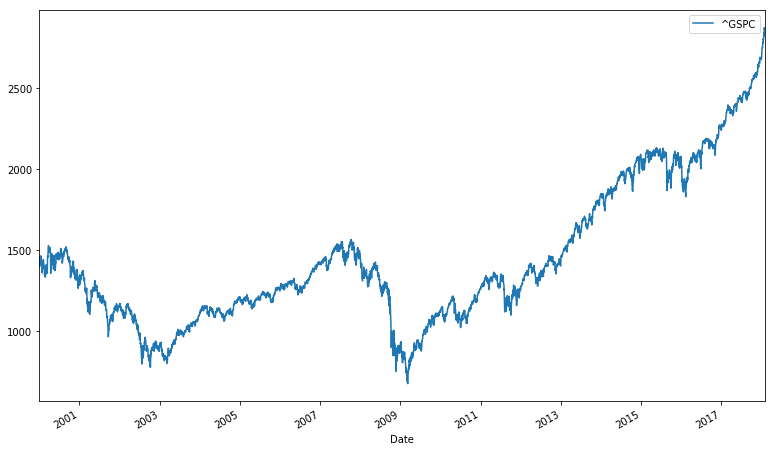

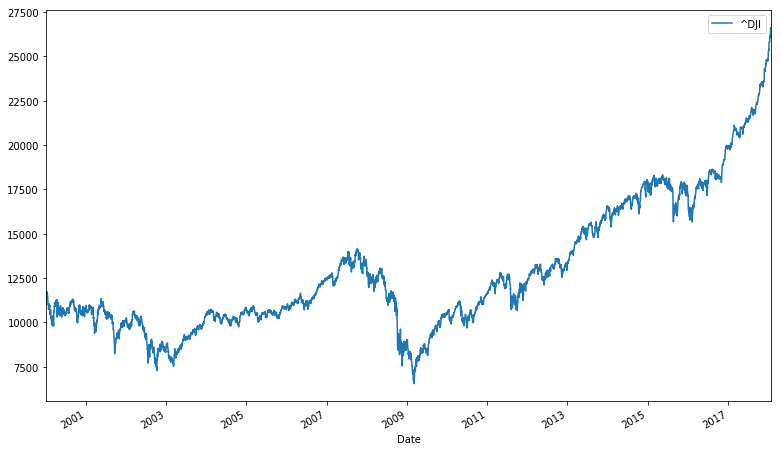

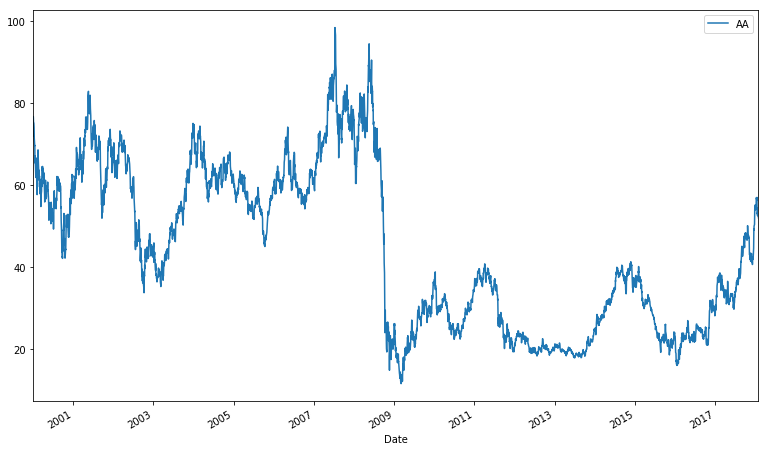

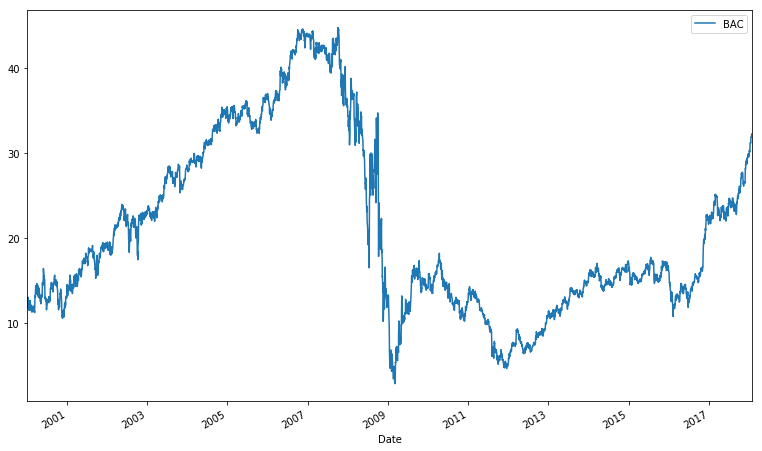

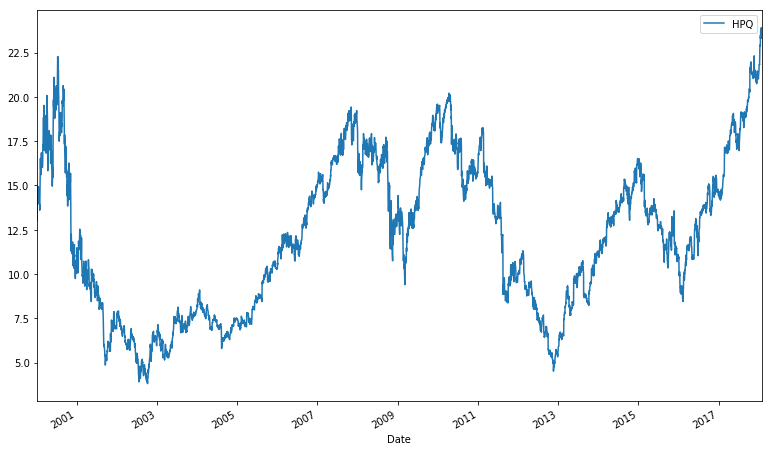

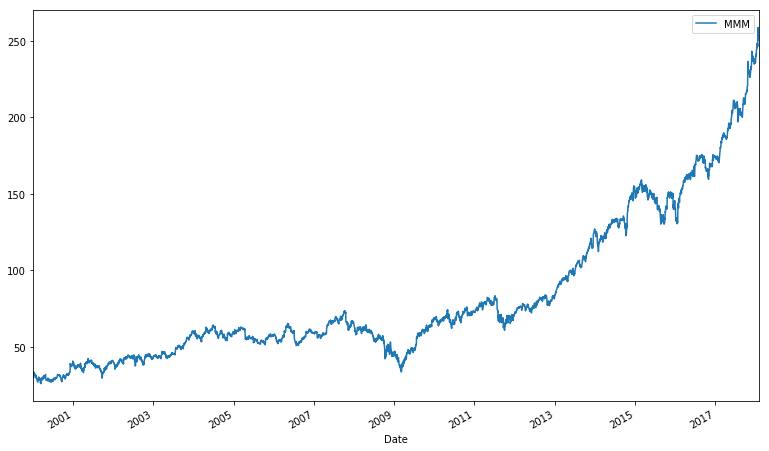

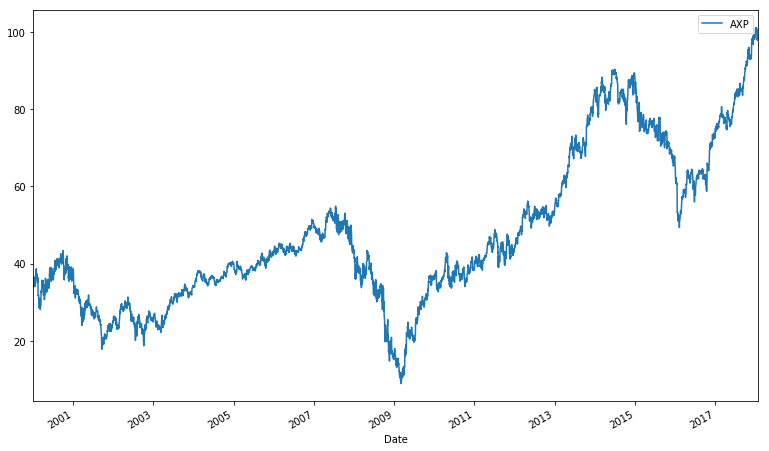

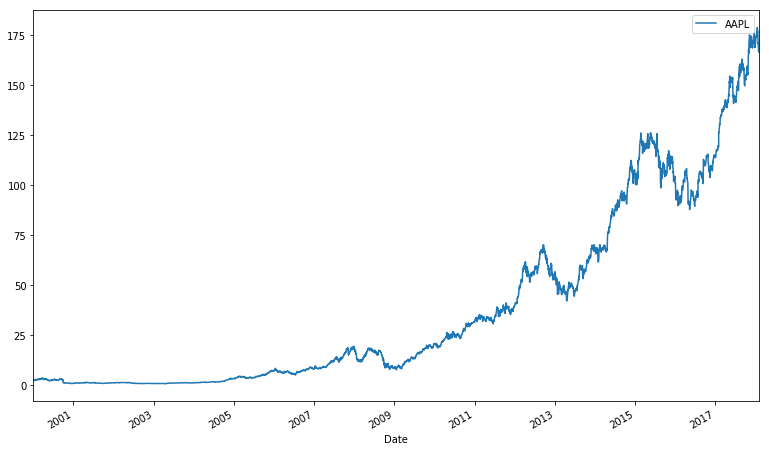

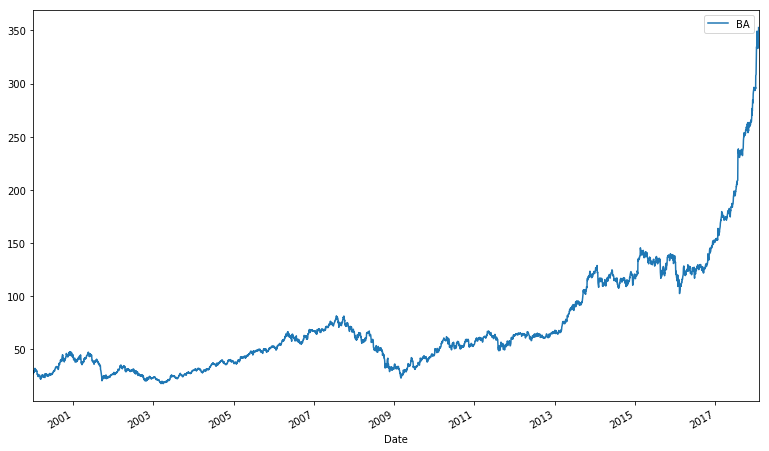

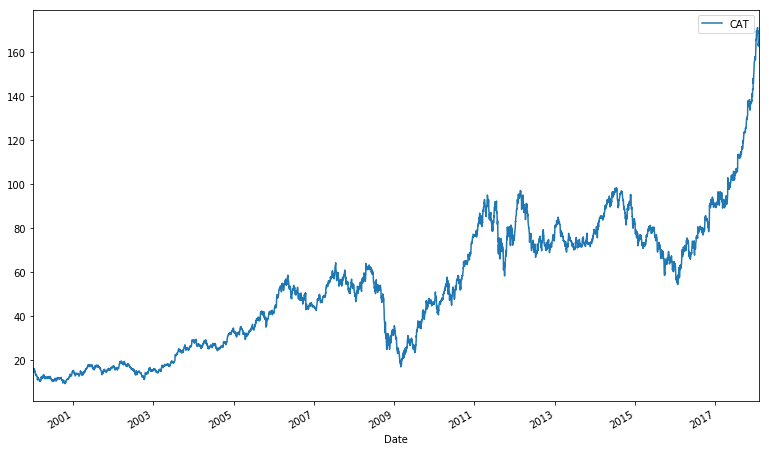

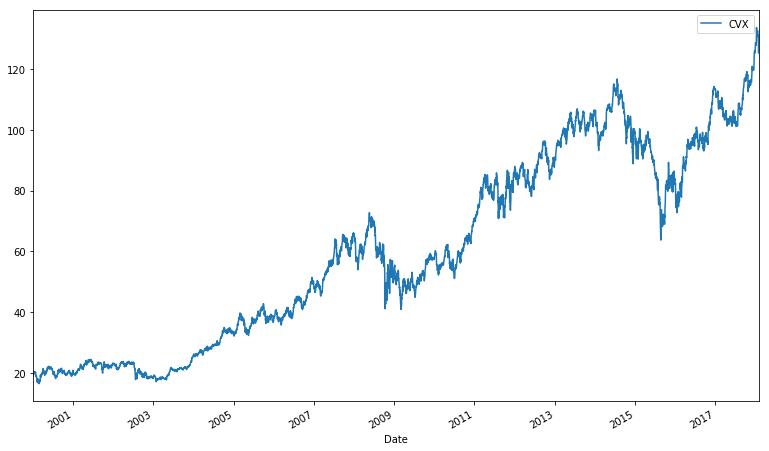

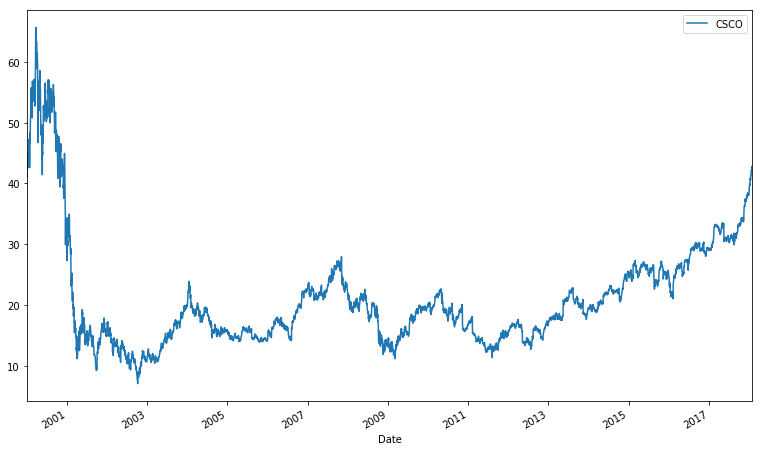

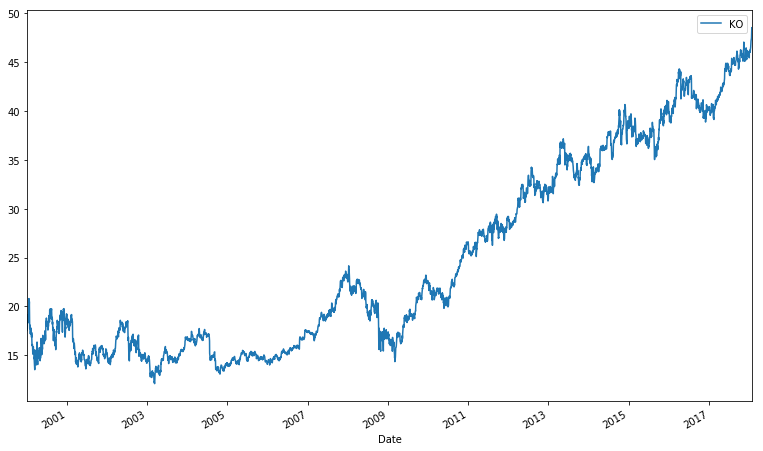

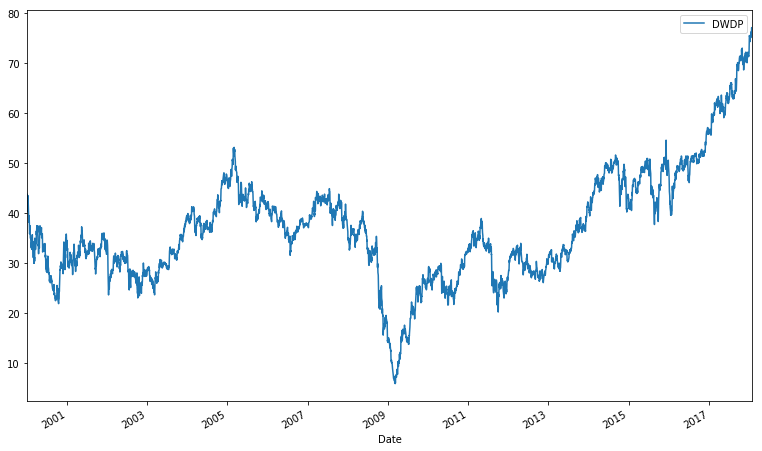

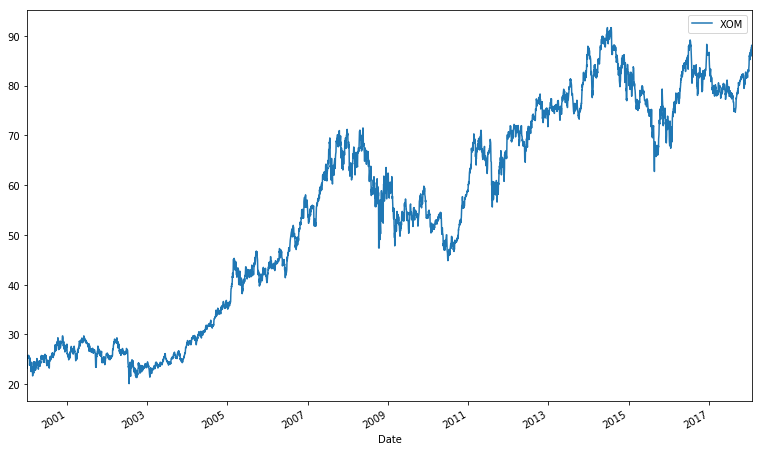

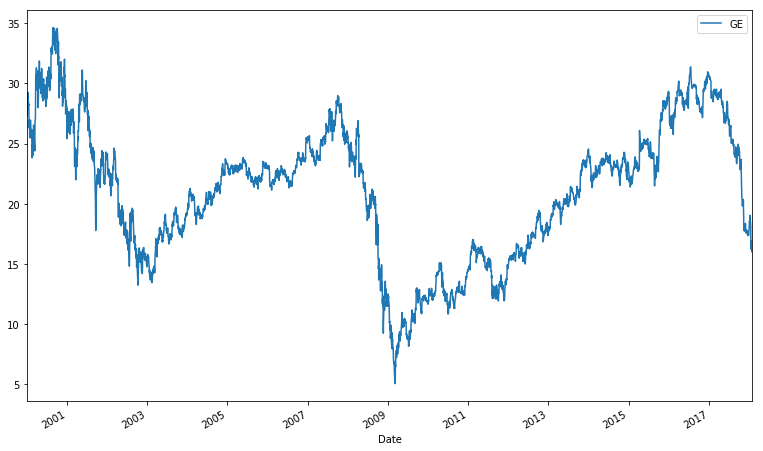

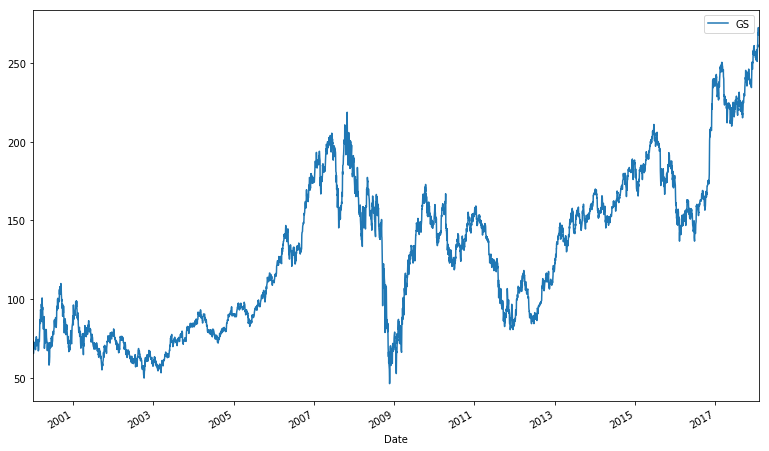

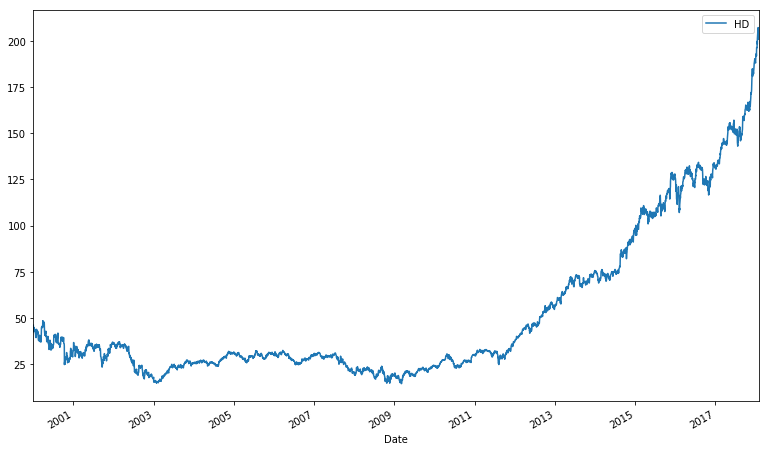

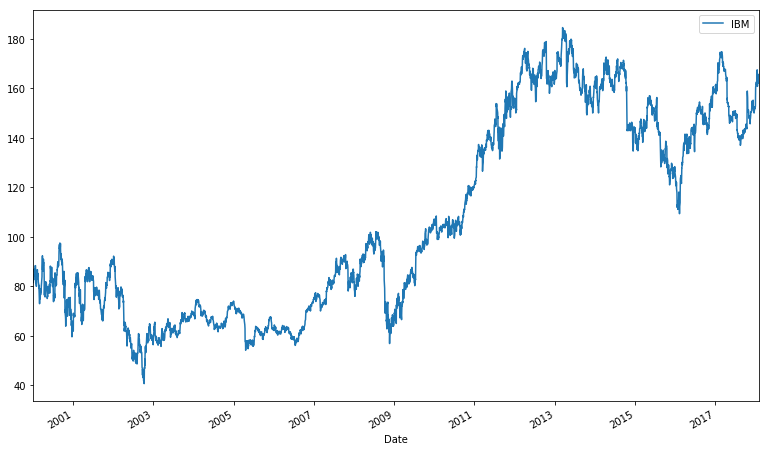

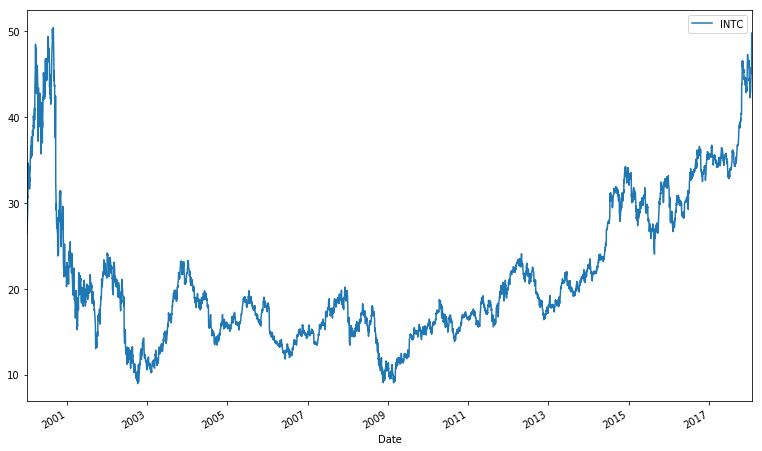

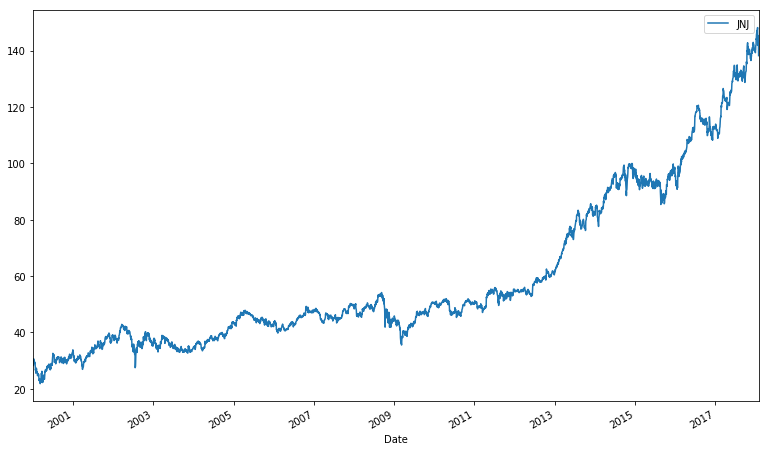

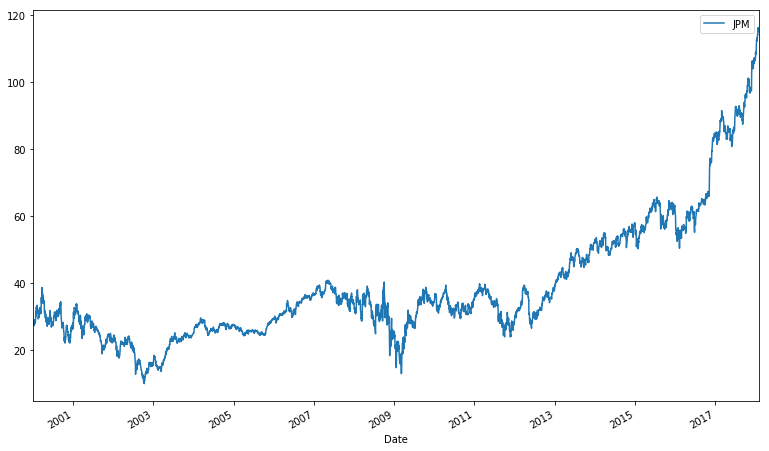

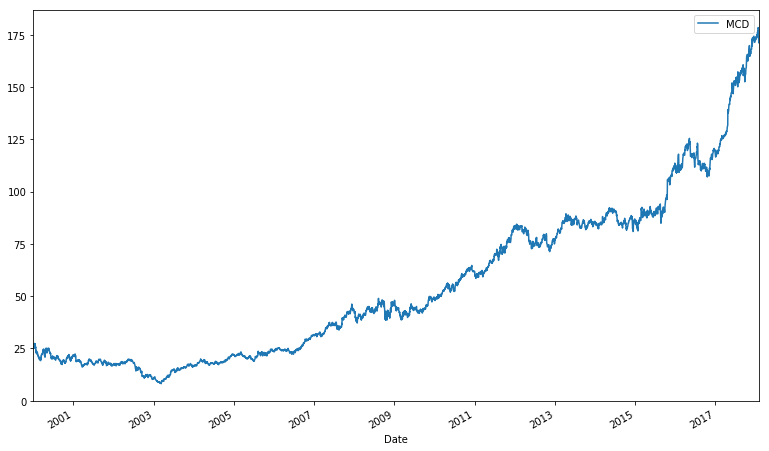

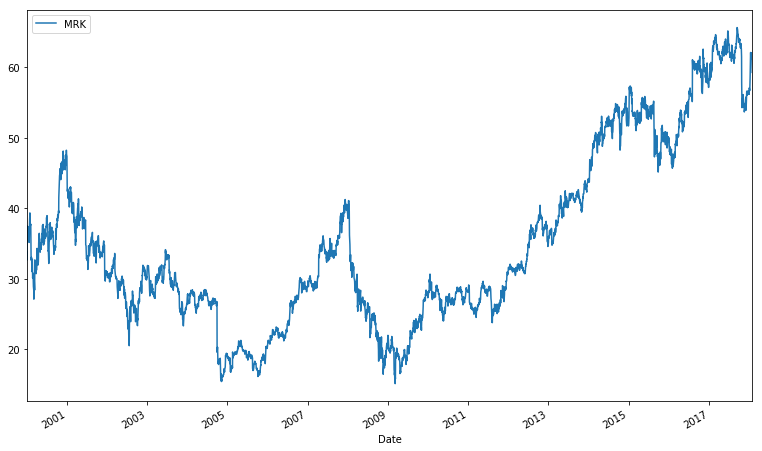

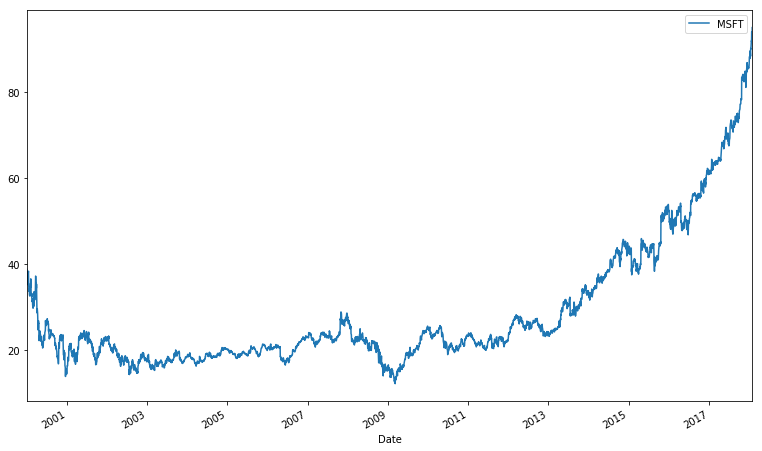

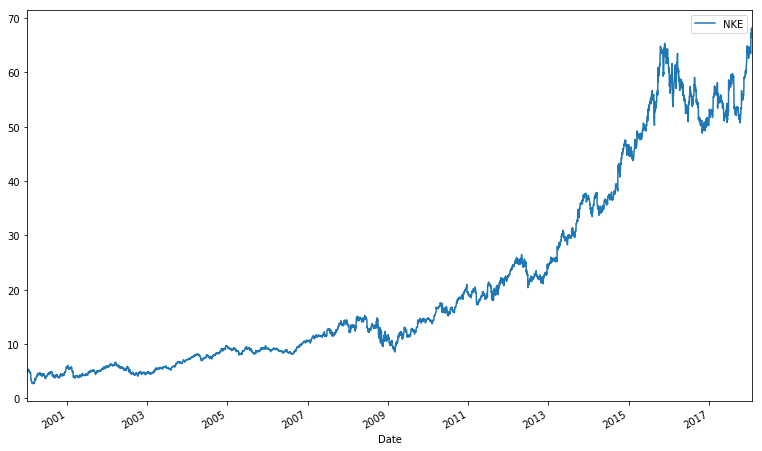

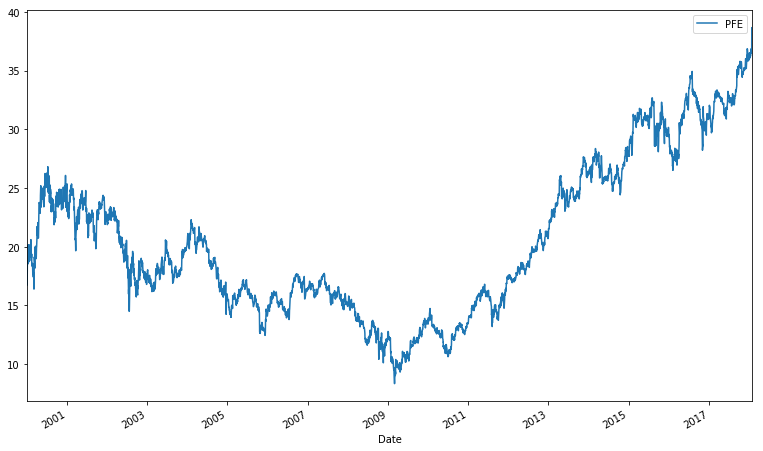

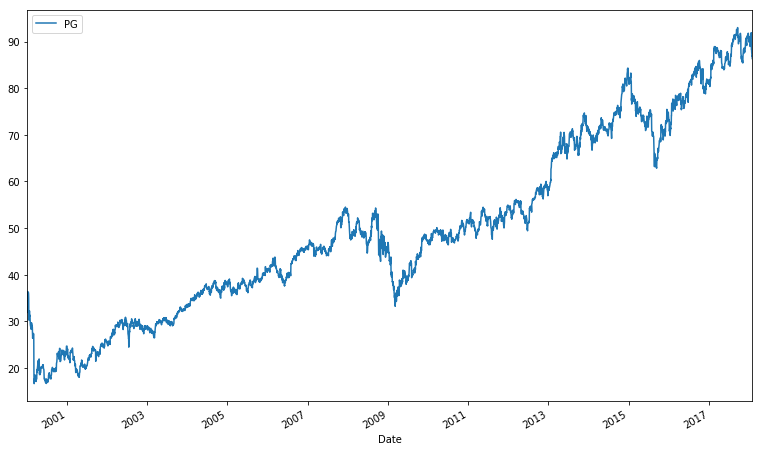

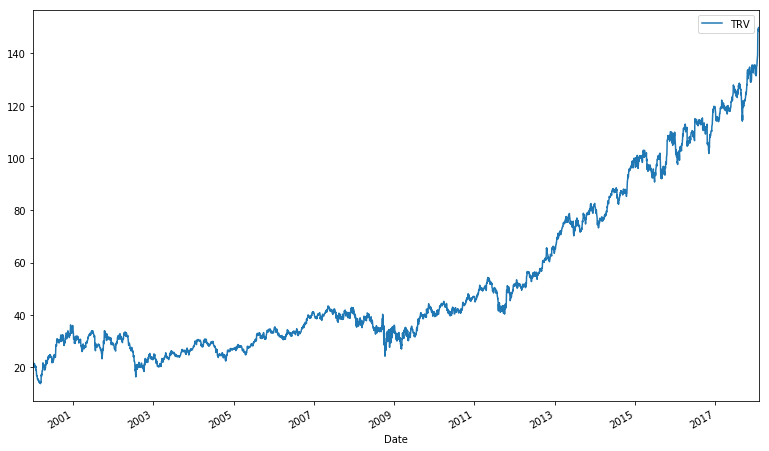

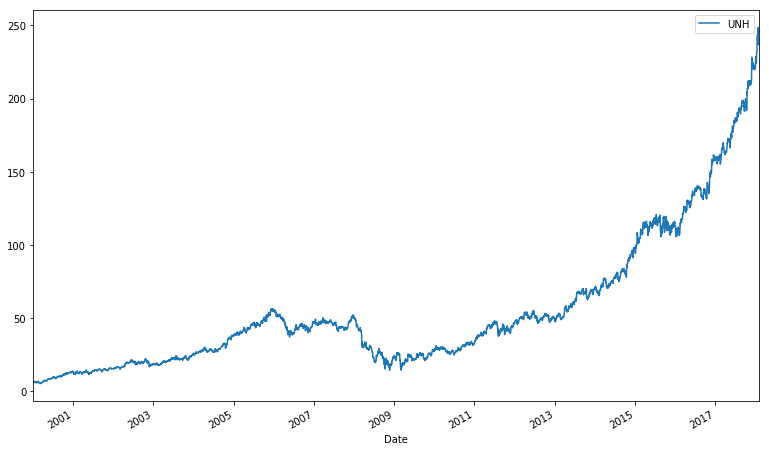

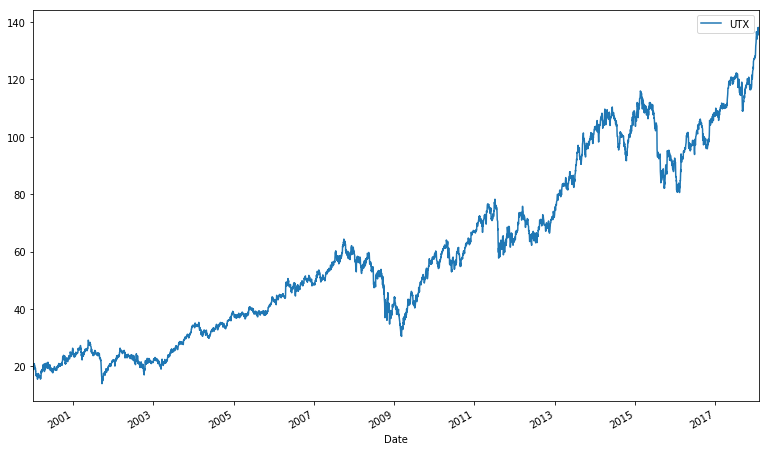

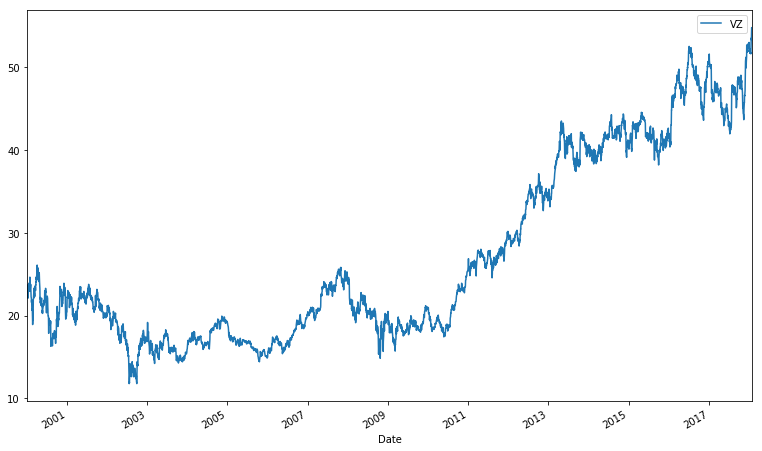

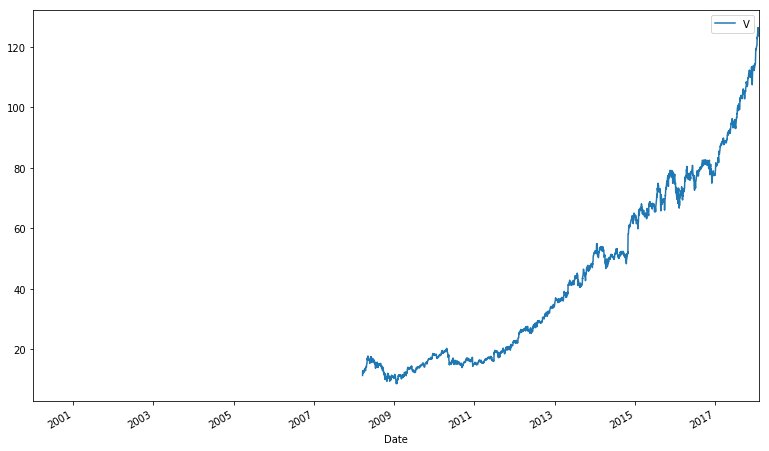

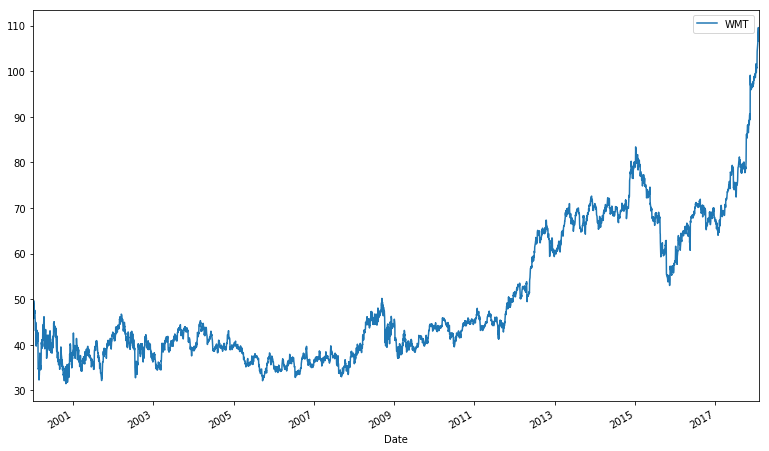

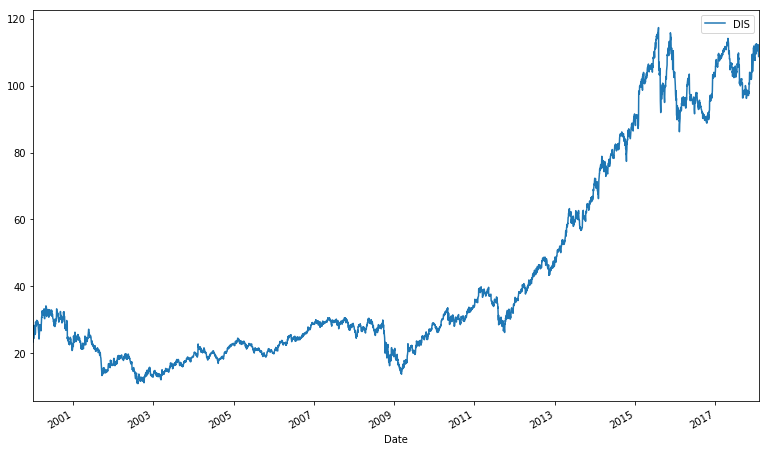

In [13]:
for i in tickers:

    stock_data_adj_close[[i]].plot(figsize=(13, 8))

    plt.show()


In [14]:
MSFT_closed = stock_data_adj_close['MSFT']

In [15]:
AAPL_closed = stock_data_adj_close['AAPL']

In [16]:
JPM_closed = stock_data_adj_close['JPM']

In [18]:
MSFT_AAPL_coef = np.corrcoef(MSFT_closed,AAPL_closed)
MSFT_AAPL_coef

array([[ 1.        ,  0.92886357],
       [ 0.92886357,  1.        ]])

In [19]:
MSFT_closed.corr(AAPL_closed)

0.92886357365708627

In [21]:
M_A_J_coef = np.corrcoef([MSFT_closed,AAPL_closed,JPM_closed])  # this is the 3*3 correlation coefficient matrix
M_A_J_coef

array([[ 1.        ,  0.92886357,  0.96044345],
       [ 0.92886357,  1.        ,  0.93216769],
       [ 0.96044345,  0.93216769,  1.        ]])

In [23]:
M_A_coin_result = ts.coint(MSFT_closed, AAPL_closed)
M_A_coin_result

(-1.2289760734557407,
 0.85014925007135322,
 array([-3.89884969, -3.3374738 , -3.04538267]))

In [24]:
M_J_coin_result = ts.coint(MSFT_closed, JPM_closed)    # we can see JPM and MSFT are cointegrated
M_J_coin_result

(-4.3714141685403183,
 0.0019764586371145056,
 array([-3.89884969, -3.3374738 , -3.04538267]))

In [28]:
# this is the adjusted price for apple, microsoft, DJIA, S&P500

msft_jpm_data = stock_data_adj_close[['AAPL','JPM']] 

msft_jpm_data.index = stock_data_adj_close.index

In [30]:
msft_jpm_data.head(10)

,AAPL,JPM
Date,,
2000-01-03,2.706315,28.496023
2000-01-04,2.478144,27.870768
2000-01-05,2.514410,27.698729
2000-01-06,2.296816,28.091967
2000-01-07,2.405613,28.608088
2000-01-10,2.363304,28.116539
2000-01-11,2.242418,27.452944
2000-01-12,2.107934,27.625008
2000-01-13,2.339126,28.042803


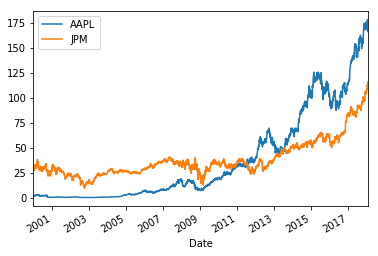

In [31]:
msft_jpm_data.plot()

plt.show()

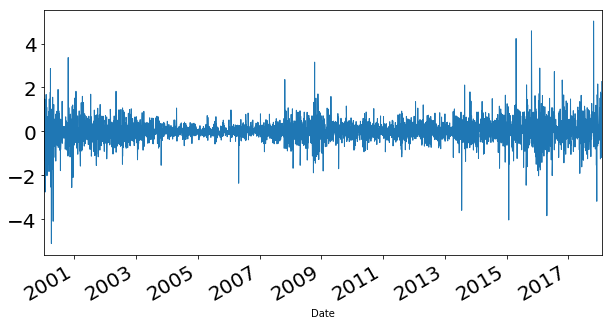

In [35]:
# plot the first order difference of stock data
MSFT_closed.diff().plot(figsize=(10,5), linewidth=1, fontsize=20)
plt.show()

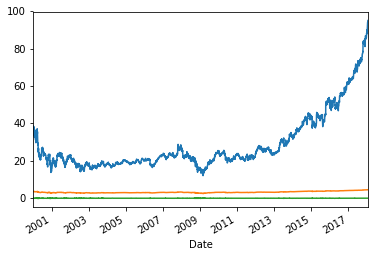

In [36]:
# Let's compare the original plot, and log plot. to see the differences
MSFT_closed.plot()
np.log(MSFT_closed).plot()
np.log(MSFT_closed).diff().plot()
plt.show()

In [38]:
df_ols = stock_data_adj_close.drop([ 'AA', 'BAC','HPQ','CSCO','V','MRK','MMM','HD','IBM'],1).dropna()

df_ols.describe()

,AAPL,AXP,BA,CAT,CVX,DIS,DWDP,GE,GS,INTC,...,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM,^DJI,^GSPC
count,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,...,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,38.350600,47.504383,72.041508,53.309312,60.402263,43.412883,36.970914,21.065583,129.451397,21.327698,...,20.431367,49.933213,53.123694,54.800710,59.657593,27.104162,49.662116,55.120400,12803.796871,1441.853605
std,45.829269,19.936151,51.743627,29.993251,31.395341,30.770673,11.370011,5.646125,49.186134,8.416860,...,6.642987,19.451738,31.653942,46.979874,30.750689,11.251690,14.804208,21.213935,3709.861371,438.226401
min,0.634405,8.832246,17.742010,9.466660,16.461515,10.986330,5.959265,5.013939,46.261528,8.942038,...,8.326145,16.668409,13.631051,5.246582,13.999461,11.788301,31.474863,20.112173,6547.049805,676.530029
25%,2.683649,33.942532,36.847458,26.337090,29.132969,21.525162,29.427794,16.914415,84.709282,15.509722,...,15.393550,36.210838,30.145784,22.995481,33.886555,18.144569,38.729958,31.718996,10318.160156,1135.260010
50%,15.992618,41.599438,57.828712,52.604412,57.135208,29.179569,35.539055,22.036922,130.714615,18.613817,...,18.548948,47.537903,39.815067,42.436378,55.144630,21.991491,43.254089,56.984234,11382.259766,1317.369995
75%,60.703072,60.744125,93.029686,75.293221,89.966614,60.434505,43.117588,24.602360,161.484772,25.562449,...,24.929131,67.366669,75.348198,63.681988,85.187988,39.242458,64.262421,75.001823,15233.219727,1658.780029
max,178.532104,101.220001,352.629303,170.889999,133.600006,117.301552,77.019997,34.648567,272.480011,50.367672,...,38.661823,92.988976,149.919998,248.470001,138.009995,54.720001,109.550003,91.645531,26616.710938,2872.870117


In [139]:
# mod = ols(formula='^DJI ~ + JPM + KO + MCD + MSFT + NIKE+ PFE+ PG +TRV+ UNH + UTX + VZ + WMT + XOM', data = df_ols)

# result = mod.fit()

# print(result.summary())

In [40]:
regression_model = LinearRegression()

In [41]:
# regression_model.fit(X_train, y_train)
DJI = stock_data_adj_close['^DJI']
GSPC = stock_data_adj_close['^GSPC']
X_part = stock_data_adj_close[['AAPL','BA','CAT','KO','DWDP','XOM','GE','GS','INTC','JNJ','JPM',

          'MCD','MRK','MSFT','PFE','PG','TRV','UNH','UTX','VZ','WMT','DIS']]
regression_model.fit(X_part,DJI)
DJI_predicted = regression_model.predict(X_part) 
residual = DJI- DJI_predicted


In [42]:
ADF(residual)


(-7.4269270762885506,
 6.5117018572924086e-11,
 1L,
 4547L,
 {'1%': -3.4317889697617718,
  '10%': -2.5671084688299888,
  '5%': -2.8621758550912744},
 46894.364558826805)

In [45]:
#etf_dir = 'C:\\Users\\326276813\\Desktop\\Other Files\\udemy\\etf_data.pkl.gz'
with gzip.open('etf_data.pkl.gz', 'r') as f:
    etf_data = cPickle.load(f)

In [47]:
etf_adj_close = etf_data['Adj Close']

In [49]:
etf_adj_close_log = etf_adj_close.apply(np.log)


In [50]:
etf_adj_close_log.head(10)

,AGG,BND,DIA,IJH,IJR,IVV,IVW,IWD,IWF,IWM,...,QQQ,SPY,VB,VNQ,VO,VOO,VTI,VTV,VUG,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,4.325434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.434695,4.642537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.298831
2000-01-04,NaN,NaN,4.291978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.363627,4.602645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.254131
2000-01-05,NaN,NaN,4.304848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.337800,4.604432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.246242
2000-01-06,NaN,NaN,4.309894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.266651,4.588231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.289220
2000-01-07,NaN,NaN,4.342901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.383263,4.644683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.305636
2000-01-10,NaN,NaN,4.347220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.410662,4.648108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.287842
2000-01-11,NaN,NaN,4.339784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.360791,4.636070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.271128
2000-01-12,NaN,NaN,4.342360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.338527,4.626072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.290601
2000-01-13,NaN,NaN,4.346142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.397056,4.639524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320454


In [51]:
for i in etf_adj_close_log.columns:

    name = i+'_adj_closed_log'

    print(name)

    globals()[name] = etf_adj_close_log[[i]]


AGG_adj_closed_log
BND_adj_closed_log
DIA_adj_closed_log
IJH_adj_closed_log
IJR_adj_closed_log
IVV_adj_closed_log
IVW_adj_closed_log
IWD_adj_closed_log
IWF_adj_closed_log
IWM_adj_closed_log
LQD_adj_closed_log
QQQ_adj_closed_log
SPY_adj_closed_log
VB_adj_closed_log
VNQ_adj_closed_log
VO_adj_closed_log
VOO_adj_closed_log
VTI_adj_closed_log
VTV_adj_closed_log
VUG_adj_closed_log
XLF_adj_closed_log


In [53]:
# here,this GSPC from above, previous excel file
GSPC = stock_data_adj_close[['^GSPC']]
GSPC_log = GSPC.apply(np.log)

In [55]:
GSPC_log.head(10)

,^GSPC
Date,
2000-01-03,7.282912
2000-01-04,7.243813
2000-01-05,7.245734
2000-01-06,7.246689
2000-01-07,7.273419
2000-01-10,7.284547
2000-01-11,7.271398
2000-01-12,7.267002
2000-01-13,7.279098


In [56]:
etf_adj_close_log_No_NA = etf_adj_close_log.dropna(axis=1, how='any')

In [59]:
start_date = '2013-01-03'
end_date = '2017-12-29'

etf_test_5year = etf_adj_close_log_No_NA.loc[start_date:end_date] 

GSPC_first_test = GSPC_log.loc[start_date:end_date] 


In [76]:
first_test_regression_model = LinearRegression()

first_test_regression_model.fit(etf_test_5year,GSPC_first_test)

GSPC_first_predicted = first_test_regression_model.predict(etf_test_5year) 

GSPC_first_test_residual = GSPC_first_test- GSPC_first_predicted

ADF(GSPC_first_test_residual.values.flatten())
# check_for_stationarity(GSPC_first_test_residual)


(-2.7223359082999488,
 0.070252288351449449,
 0L,
 1257L,
 {'1%': -3.4355629707955395,
  '10%': -2.567995644141416,
  '5%': -2.8638420633876671},
 -13280.028672018721)

In [95]:
print(first_test_regression_model.coef_) # here is the coefficients of different assets

[[-0.04379307 -0.17642238  1.13677953 -0.00811386]]


In [96]:
print(first_test_regression_model.intercept_)  # print the coefficient of the constant term 

[ 2.69554927]


In [81]:
check_for_stationarity(GSPC_first_test_residual.values.flatten())

p-value = 0.0702522883514 The series  is likely non-stationary.


False

In [62]:
ts.coint(GSPC_first_test, etf_test_5year)

(-2.2182474766805091,
 0.8996906717212575,
 array([-4.9750017 , -4.42636781, -4.1401179 ]))

In [84]:
GSPC_first_test_residual.name = 'residual'

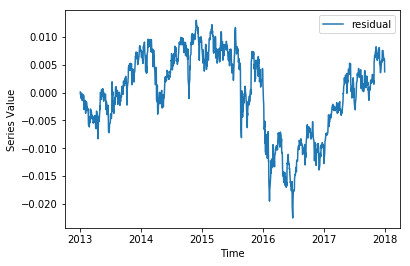

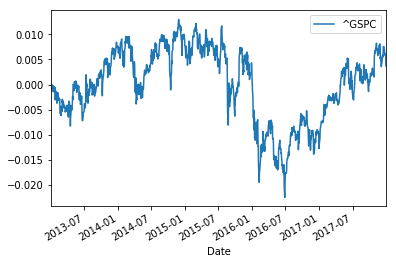

In [88]:
plt.plot(GSPC_first_test_residual.index, GSPC_first_test_residual.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([GSPC_first_test_residual.name])
plt.show()

GSPC_first_test_residual.plot()
plt.show()

In [97]:
# =============================================================================
#let's use the statsmodels.sm ols method
# =============================================================================

etf_test_5year_constant = sm.add_constant(etf_test_5year)

sm_ols_results = sm.OLS(GSPC_first_test, etf_test_5year_constant).fit()

print(sm_ols_results.params)

print(sm_ols_results.summary())



const    2.695549
DIA     -0.043793
QQQ     -0.176422
SPY      1.136780
XLF     -0.008114
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.129e+05
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        23:44:09   Log-Likelihood:                 4421.5
No. Observations:                1258   AIC:                            -8833.
Df Residuals:                    1253   BIC:                            -8807.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [108]:
coeffs = sm_ols_results.params[1:]
sm_ols_residual = GSPC_first_test - coeffs * etf_test_5year
sm_ols_residual.name = 'residual'
sm_ols_results.resid

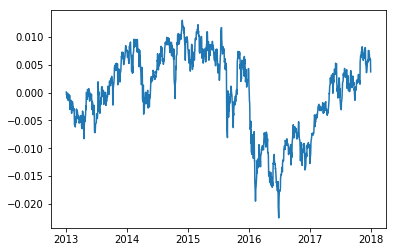

In [127]:
plt.plot(GSPC_first_test_residual) 
plt.show()

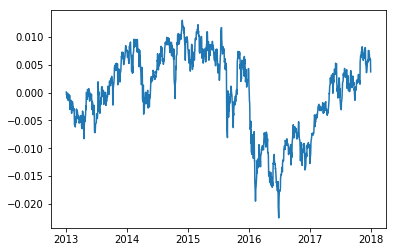

In [128]:
plt.plot(sm_ols_results.resid)
plt.show()

# let's do the stationary test for every etfs in the dataframe 

In [130]:
for i in etf_test_5year.columns:
    etf = etf_test_5year[[i]]
    pvalue = ADF(etf.values.flatten())[1]
    if pvalue < 0.01:
        print("original %s is stationary, cause pvalues is %s less than 0.01" % (i, pvalue))
    else:
        etf = etf.diff(1).dropna() 
        pvalue = ADF(etf.values.flatten())[1]
        if pvalue < 0.01:
            print("%s is stationary in first difference , cause pvalues is %s less than 0.01" % (i, pvalue))
        else:
            print("%s is not stationary in first difference, and the p-value is %s" %(i,pvalue))


DIA is stationary in first difference , cause pvalues is 0.0 less than 0.01
QQQ is stationary in first difference , cause pvalues is 0.0 less than 0.01
SPY is stationary in first difference , cause pvalues is 0.0 less than 0.01
XLF is stationary in first difference , cause pvalues is 0.0 less than 0.01


In [138]:
            
print(ADF(GSPC_first_test.values.flatten()))

GSPC_first_test_diff = GSPC_first_test.diff(1).dropna()          
 
print(ADF(GSPC_first_test_diff.values.flatten()))       
      

(-1.3209635489326206, 0.61952773186318011, 0L, 1257L, {'5%': -2.8638420633876671, '1%': -3.4355629707955395, '10%': -2.567995644141416}, -8567.4835247395731)
(-36.32807972124413, 0.0, 0L, 1256L, {'5%': -2.8638438984080117, '1%': -3.4355671297788666, '10%': -2.5679966213893057}, -8558.8995771421523)


In [78]:
def check_for_stationarity(X, cutoff=0.01):

    # H_0 in adfuller is unit root exists (non-stationary)

    # We must observe significant p-value to convince ourselves that the series is stationary

    pvalue = ADF(X)[1]

    if pvalue < cutoff:

        print 'p-value = ' + str(pvalue) + ' The series '  +' is likely stationary.'

        return True

    else:

        print 'p-value = ' + str(pvalue) + ' The series '+' is likely non-stationary.'

        return False

## 2018/05/20

In [3]:
import pandas_datareader.data as web

In [56]:
SPY_data = web.DataReader('SPY', 'yahoo',  '2017-01-01','2017-05-01')

In [57]:
TSLA_data = web.DataReader('TSLA', 'yahoo', '2017-01-01','2017-05-01')

In [58]:
SPY_adj = SPY_data[['Adj Close']]

In [59]:
TSLA_adj = TSLA_data[['Adj Close']]

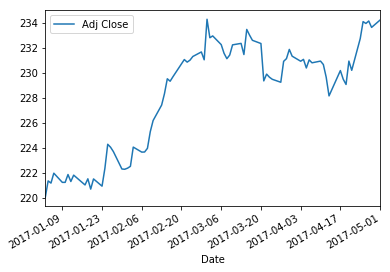

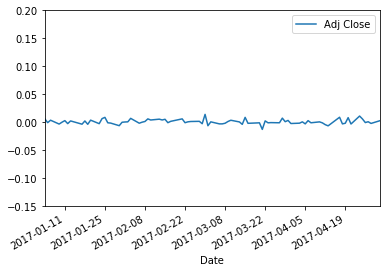

In [60]:
SPY_adj.plot()
SPY_adj.pct_change()[1:].plot(ylim=(-0.15,0.20))
plt.show()

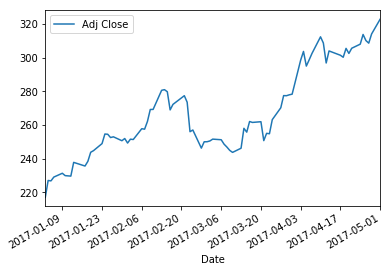

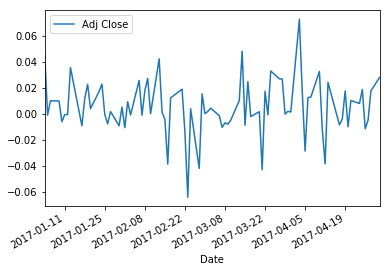

In [61]:
TSLA_adj.plot()
TSLA_adj.pct_change()[1:].plot()
plt.show()

In [62]:
from statsmodels import regression

In [63]:
# Let's define everything in familiar regression terms
X = SPY_adj.values.flatten() # Get just the values, ignore the timestamps
Y = TSLA_adj.values.flatten()

def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    # This just adds a column of 1s to our data
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

alpha: -545.597446121
beta: 3.55836845858


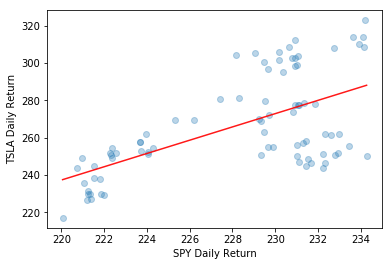

In [72]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Daily Return")
plt.ylabel("TSLA Daily Return")

 # Add the regression line, colored in red
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()